<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>



# Machine Learning: Laboratorio 03

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    
**Nombre Estudiante(s)**:  
- Julio Assmann
- César Godoy
- Cristhian Solís

## Objetivo de la Tarea

El objetivo de esta tarea es aplicar diferentes algoritmos de **aprendizaje supervisado**  y **aprendizaje no supervisado** en dos conjunto de datos **Titanic** y **load_breast_cancer**, utilizando herramientas de la librería **scikit-learn**.

## Metodología 
El análisis que se llevará a cabo incluirá las siguientes etapas
### Para los algoritmos supervisados en este notebook: ###
Desde libreria `scikit-learn` aplicará para `load_breast_cancer` 

1. **Exploración de Datos:** Exploración de las características del dataset, identificación de valores faltantes y distribución de las variables.
2. **Ingeniería de Características:** Transformaciones de los datos, incluyendo imputación de valores nulos, codificación de variables categóricas y normalización de características numéricas.
3. **Aplicación y Evaluación de Algoritmos Supervisados:**
   - **Análisis Discriminante Lineal (LDA)**
Se utilizarán métricas como **precisión**, **recall**, **matriz de confusión** y **ROC-AUC** para e valuar el rendimiento de los modelos.
4. **Análisis Específico de la Edad:** Se investigará si la edad es un factor determinante en la supervivencia.
5. **Predicción del Destino de Dos Pasajeros:** Se intentará predecir el destino de dos pasajeros con información incompleta en el dataset.
7. **Conclusiones:** Se resumirán los resultadosclave del análisis, incluyendo la importancia de la edad como factor de supervivencia.

## Algoritmos Supervisados

### 1.Exploración de los datos

El conjunto de datos utilizado es **Breast Cancer Wisconsin (Diagnostic)**, el cual se puede cargar directamente desde la librería `scikit-learn` utilizando la función `load_breast_cancer()`. Este dataset contiene **569 instancias** y **30 características** numéricas relacionadas con las propiedades físicas de las células mamarias, tales como:

- Radio del núcleo de la célula.
- Textura.
- Perímetro.
- Área.
- Simetría, entre otras.

Cada registro está asociado a una etiqueta de clase, indicando si el tumor es:
- **Maligno** (etiquetado como 0)
- **Benigno** (etiquetado como 1)

Este dataset es ampliamente utilizado para evaluar algoritmos de clasificación debido a su naturaleza bien estructurada y a la importancia del problema médico que aborda.

### ***Librerias***

In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploración de Datos (EDA)

## 1.1 Carga de los datos

Primero cargamos el dataset y verificamos la estructura de los datos.

In [9]:
# Cargar el dataset
data = load_breast_cancer()

# Crear un DataFrame
df_breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la columna de la variable objetivo (target)
df_breast_cancer['target'] = data.target

# Mostrar las primeras filas del dataset
df_breast_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**1.2 Revisamos la información del Dataset**  
Revisamos la estructura, tipos de datos y valores faltantes.

In [10]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df_breast_cancer.shape

(569, 31)

In [12]:
# Estadísticas descriptivas
df_breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


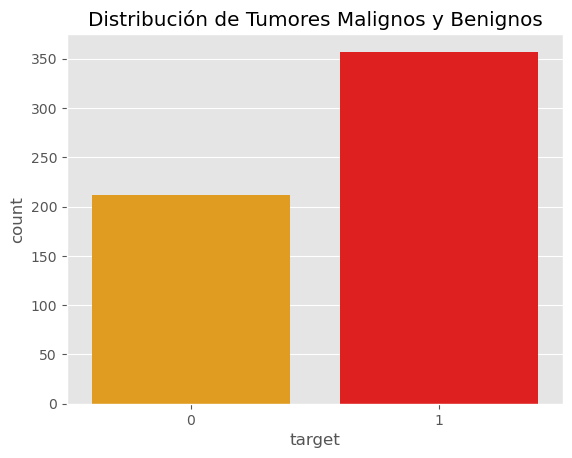

In [13]:
# Contar la distribución de la variable objetivo con colores específicos
plt.style.use('ggplot')
sns.countplot(x='target', data=df_breast_cancer, hue='target', palette=['orange', 'red'], legend=False)
plt.title('Distribución de Tumores Malignos y Benignos')
plt.show()

Calcular la matriz de correlación

In [14]:
# Calcular la matriz de correlación
correlation_matrix = df_breast_cancer.corr()

# Correlación de las variables con la variable objetivo 'target'
correlation_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlation_target)


target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

Seleccionar las variables más correlacionadas

Una vez seleccionadas las variables más relevantes, generamos el pairplot solo con esas variables.

A partir de estos, podemos ver que las variables más correlacionadas negativamente con la variable objetivo (target) son las siguientes:

1. worst concave points (-0.79)
2. worst perimeter (-0.78)
3. mean concave points (-0.78)
4. worst radius (-0.78)
5. mean perimeter (-0.74)
6. worst area (-0.73)
7. mean radius (-0.73)

Estas variables tienen una fuerte correlación negativa con la variable target, lo que indica que a medida que estos valores aumentan, la probabilidad de que el tumor sea maligno aumenta.

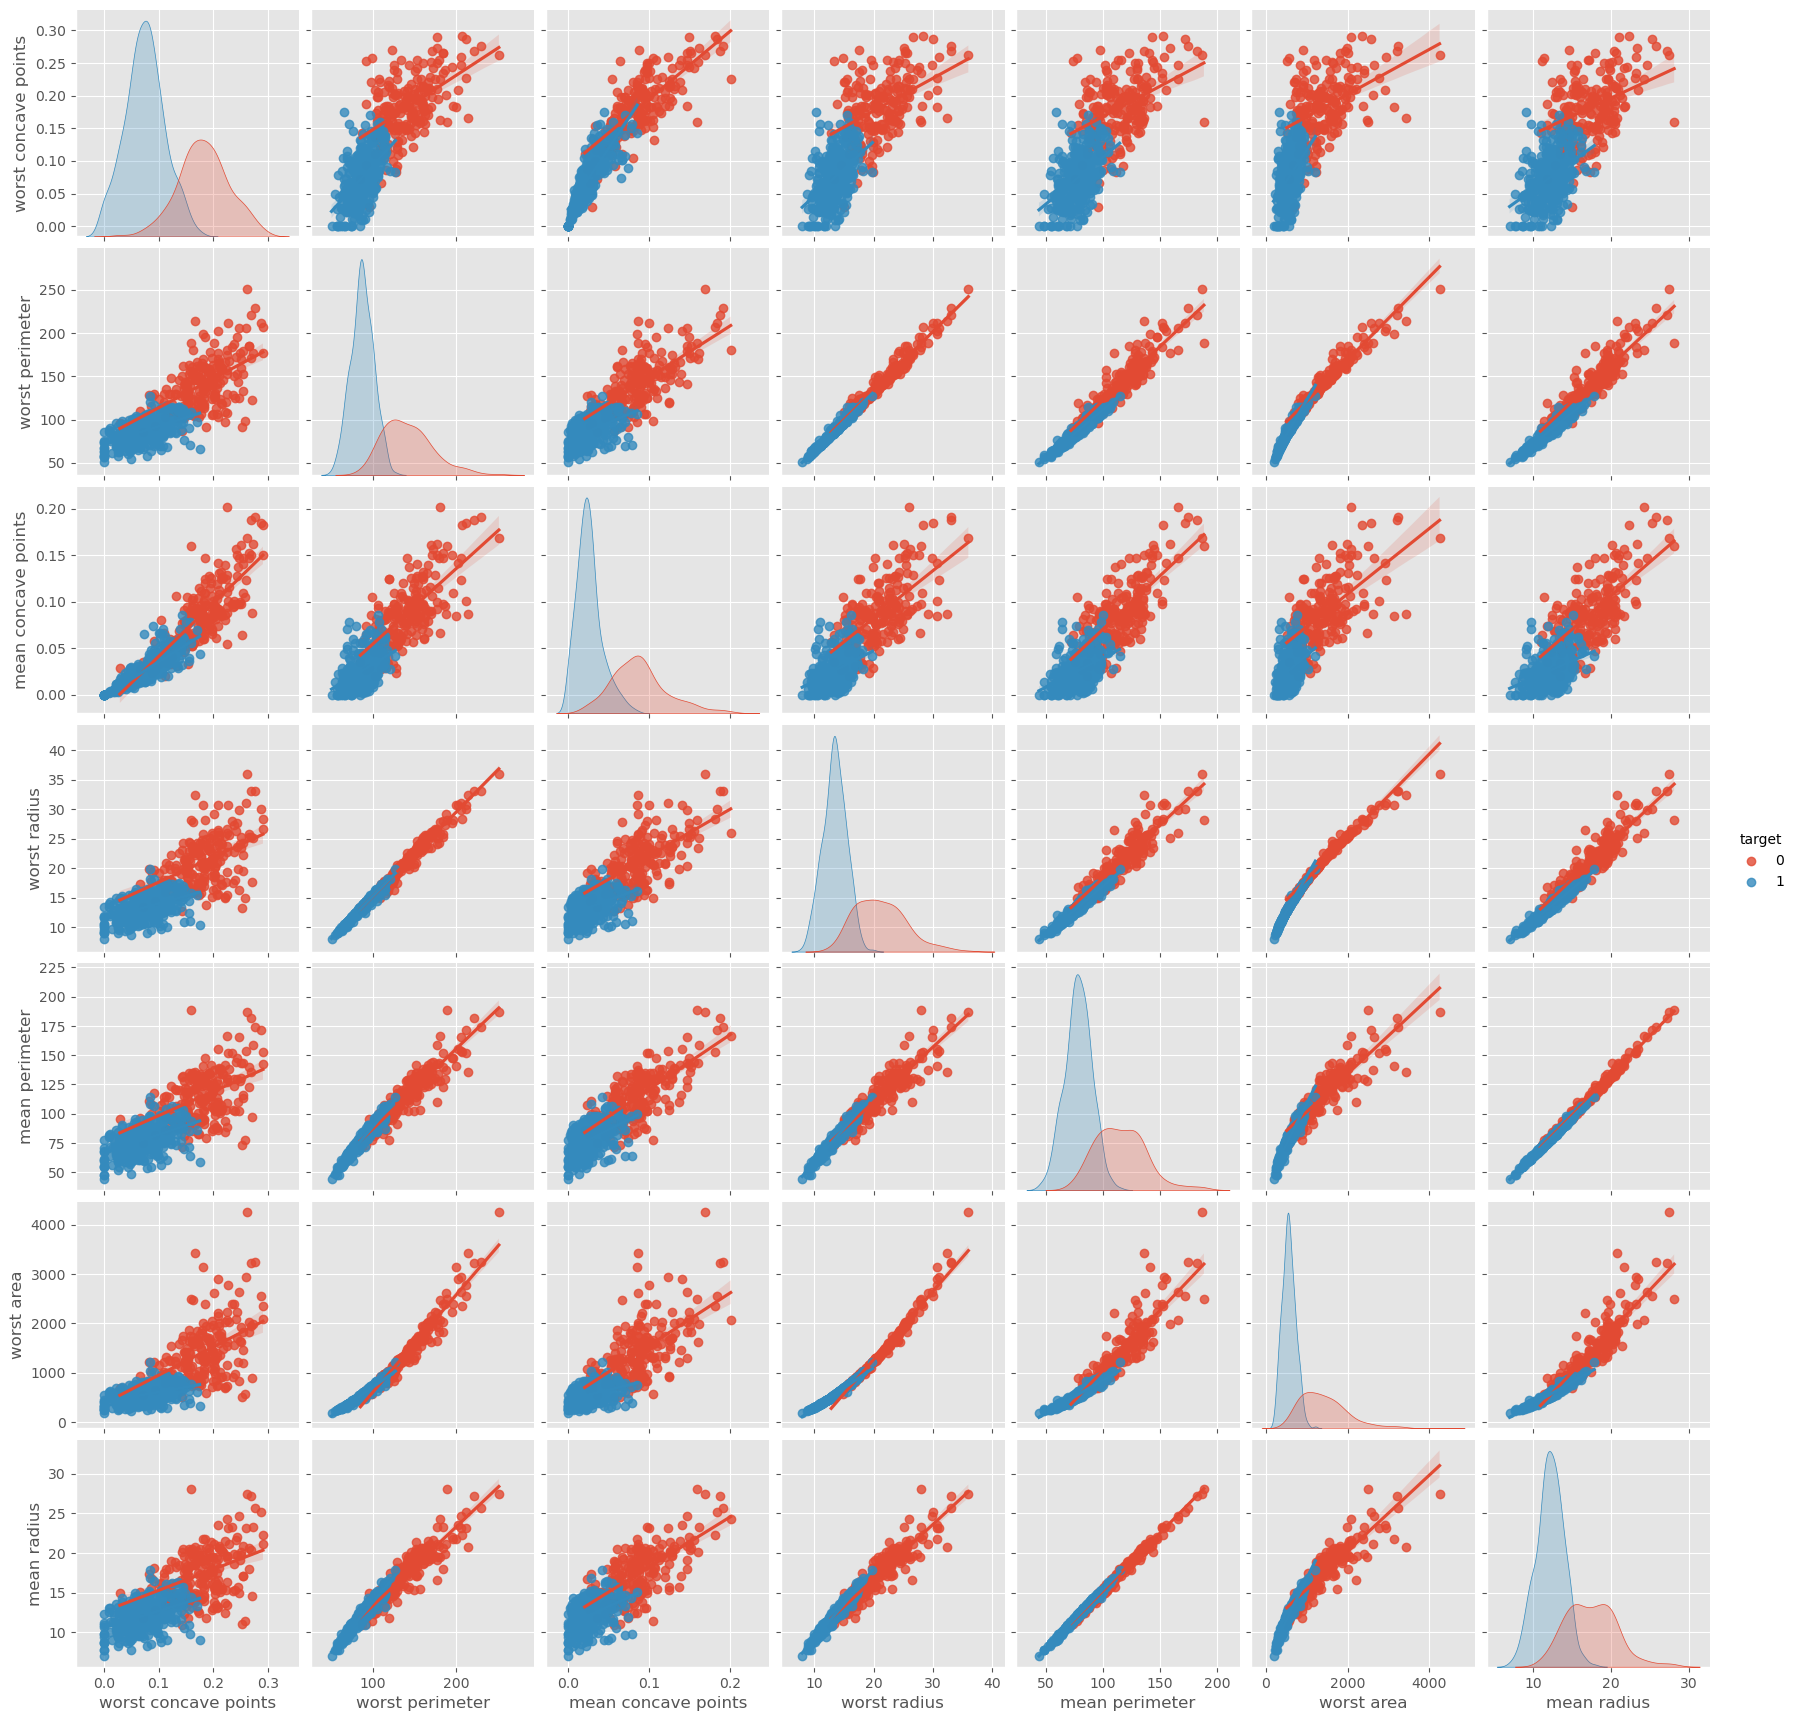

In [16]:
plt.style.use('ggplot')
# Seleccionar las variables más correlacionadas con 'target'
selected_features = ['worst concave points', 'worst perimeter', 'mean concave points', 
                    'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'target']

# Crear un nuevo DataFrame con las variables seleccionadas
df_selected = df_breast_cancer[selected_features]

# Generar el pairplot simplificado
sns.pairplot(df_selected, hue='target', kind='reg', diag_kind='kde')
plt.show()


## Interpretación Pairplot (Simplificado)

El gráfico de pares muestra las relaciones entre las variables más correlacionadas con la variable objetivo (`target`), donde:
- **0**: Tumor maligno (naranja)
- **1**: Tumor benigno (azul)

### 1. Distribución de las Clases por Variable
En la diagonal del gráfico, observamos las distribuciones univariadas de cada una de las variables para ambas clases. Algunas observaciones clave:

- **Worst concave points y mean concave points**: Las distribuciones de los tumores malignos están desplazadas hacia valores más altos en comparación con los benignos. Esto sugiere que los tumores malignos tienden a tener más "puntos cóncavos", lo que podría reflejar la forma más irregular de las células malignas.
  
- **Worst perimeter y mean perimeter**: Se observa una clara diferencia en los valores de perímetro. Los tumores malignos suelen tener perímetros más grandes que los benignos, lo cual es coherente con el hecho de que los tumores malignos suelen ser más grandes y tener formas más irregulares.

- **Worst radius y mean radius**: Las variables relacionadas con el radio muestran un comportamiento similar al perímetro. Los tumores malignos tienen radios mayores, lo que probablemente también esté relacionado con su tamaño general.

- **Worst area y mean area**: Los tumores malignos tienen áreas considerablemente mayores que los benignos. Esta diferencia sugiere que el tamaño es un factor clave en la clasificación.

### 2. Relaciones Entre Variables
Los gráficos fuera de la diagonal muestran las relaciones bivariadas entre las variables, y destacan los siguientes patrones:

- **Relaciones lineales claras**: Las combinaciones de variables como `mean radius` vs. `mean perimeter` y `worst radius` vs. `worst perimeter` muestran relaciones lineales fuertes. Esto sugiere que estas características capturan aspectos similares del tamaño del tumor, lo que podría implicar que son variables redundantes. Para evitar problemas de multicolinealidad en los modelos predictivos, podría ser necesario ajustar o eliminar algunas de estas características.

- **Separación entre clases en relaciones específicas**: En algunas combinaciones, como `worst concave points` vs. `worst perimeter`, se observa una separación clara entre las clases. Los tumores malignos tienden a tener valores más altos en ambas variables, lo que refuerza la idea de que los tumores malignos son más grandes y tienen bordes más irregulares.

- **Superposición en algunas combinaciones**: En variables como `mean concave points` vs. `mean radius`, existe cierta superposición entre las clases, lo que indica que, aunque estas variables son útiles, no son suficientemente diferenciadoras por sí solas. Combinar varias variables o utilizar modelos no lineales puede ayudar a mejorar la clasificación.

### 3. Implicaciones para el Modelado
- **Tamaño y forma del tumor son indicadores clave**: Las variables relacionadas con el **radio**, **perímetro**, **área**, y **puntos cóncavos** están fuertemente correlacionadas con la clasificación de tumores malignos. Esto sugiere que estas características son fundamentales para predecir la malignidad del tumor.

- **Colinealidad**: Las fuertes correlaciones entre variables como `mean radius` y `mean perimeter` indican multicolinealidad. Para el modelado, podríamos considerar eliminar variables redundantes o aplicar técnicas de regularización (como Ridge o Lasso) para reducir el impacto de la colinealidad.

- **Relaciones no lineales**: Algunas relaciones no parecen seguir una tendencia lineal clara, lo que podría indicar que un modelo lineal puro, como la regresión logística, no capturaría completamente la complejidad de los datos. Modelos más complejos, como Random Forest o XGBoost, podrían aprovechar mejor estas relaciones no lineales.

### Conclusión
El gráfico de pares nos muestra que las características relacionadas con el tamaño del tumor (radio, área, perímetro) y la complejidad de sus bordes (puntos cóncavos) son las más útiles para diferenciar entre tumores malignos y benignos. Desde un punto de vista médico, los tumores malignos suelen ser más grandes y tener formas más irregulares. Sin embargo, algunas características están fuertemente correlacionadas entre sí, lo que sugiere que reducir la redundancia de las variables o aplicar regularización podría mejorar el rendimiento de los modelos predictivos.


# 2. Ingeniería de Características

## 2.1 Normalización de las características

Dado que las características numéricas tienen diferentes escalas, es necesario normalizar.

In [17]:
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = df_breast_cancer.drop('target', axis=1)
y = df_breast_cancer['target']

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mantener la estructura
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)

# Mostrar las primeras filas de los datos normalizados
X_scaled_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 2.2 Verificar correlaciones entre las características

Esto es útil para identificar si hay multicolinealidad.

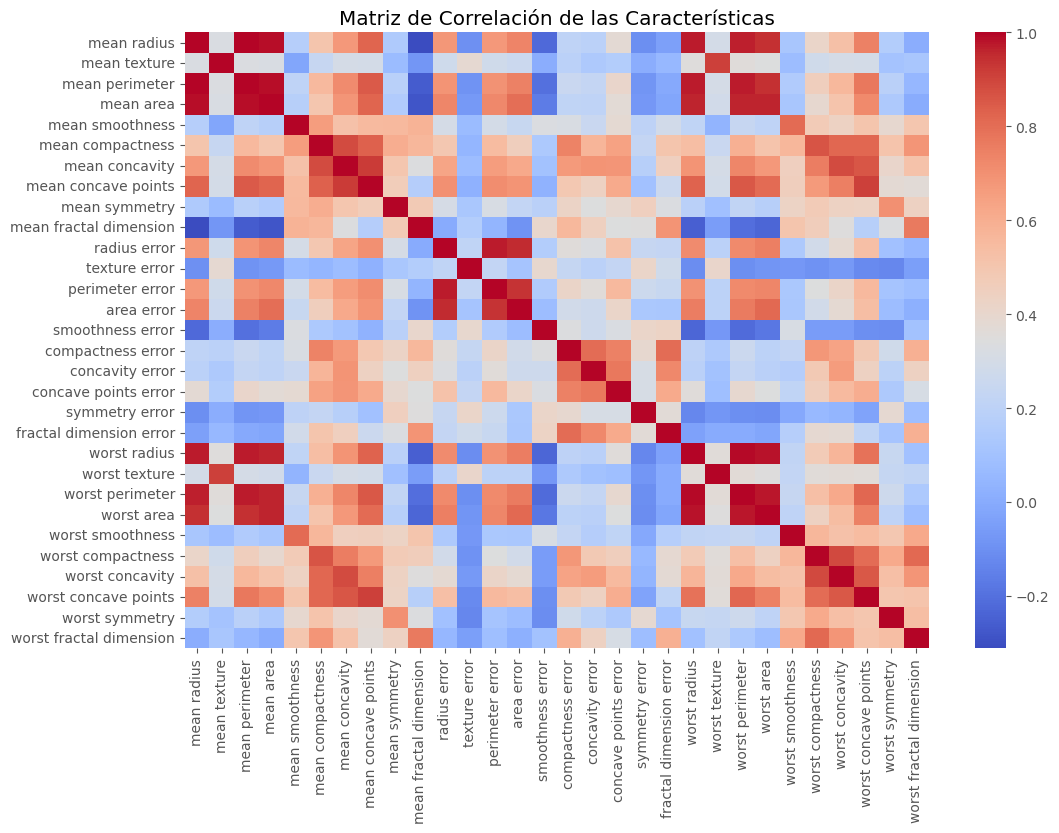

In [18]:
# Matriz de correlación
corr_matrix = X_scaled_df.corr()

# Mapa de calor de la correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación de las Características')
plt.show()


# 3. Aplicación de Algoritmos Supervisados

## 3.1 División de los datos en conjuntos de entrenamiento y prueba

Primero dividimos los datos para entrenamiento y prueba.

In [19]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (398, 30)
Tamaño del conjunto de prueba: (171, 30)


## 3.3 Implementación de Análisis Discriminante Lineal

Aplicamos este segundo algoritmo.

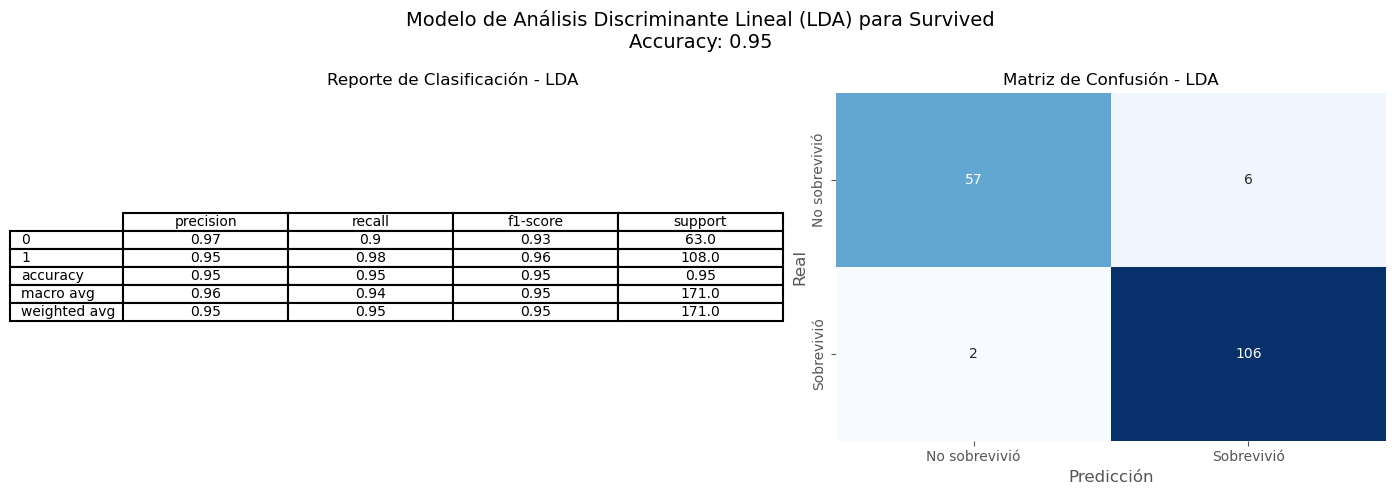

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instanciar el modelo LDA
lda_model = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lda = lda_model.predict(X_test)

# Evaluar el modelo
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
report_df_lda = pd.DataFrame(classification_report(y_test, y_pred_lda, output_dict=True)).transpose().round(2)

# Resultados del Análisis Discriminante Lineal
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Análisis Discriminante Lineal (LDA) para Survived\nAccuracy: {accuracy_lda:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - LDA", fontsize=12)
ax[0].axis('off')
table_lda = ax[0].table(cellText=report_df_lda.values, colLabels=report_df_lda.columns, rowLabels=report_df_lda.index, cellLoc='center', loc='center', edges='BRTL')
table_lda.auto_set_font_size(False)
table_lda.set_fontsize(10)
table_lda.scale(1.2, 1.2)
for key, cell in table_lda.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_lda, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - LDA", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


Conclusión de la Importancia:

El análisis de los coeficientes confirma que las mediciones relacionadas con las peores propiedades de las células mamarias (como textura, radio y simetría) tienen un impacto crucial en la predicción de tumores malignos, mientras que los puntos cóncavos promedio parecen estar más relacionados con tumores benignos.



# 4. Conclusiones

# Conclusiones del Análisis Discriminante Lineal (LDA) para Predicción de Cáncer de Mama

## Resultados Generales
- **Accuracy:** 0.95 (95% de precisión). Esto indica que el modelo clasifica correctamente el 95% de los casos, lo cual es un buen resultado.

## Reporte de Clasificación
- **Clase 0 (No tiene cáncer):**
  - **Precisión:** 0.97: Esto significa que el 97% de las predicciones de que un paciente no tiene cáncer son correctas.
  - **Recall:** 0.90: De todos los casos que realmente no tienen cáncer, el 90% fueron identificados correctamente por el modelo. Esto puede indicar que hay una cantidad razonable de falsos positivos (casos que fueron clasificados incorrectamente como positivos).
  - **F1-Score:** 0.93: Esta métrica considera tanto la precisión como el recall, indicando un buen balance entre ambos.

- **Clase 1 (Tiene cáncer):**
  - **Precisión:** 0.95: Esto sugiere que el 95% de las predicciones de que un paciente tiene cáncer son correctas.
  - **Recall:** 0.98: El modelo identificó correctamente el 98% de los casos reales de cáncer, lo que indica que es muy eficaz para detectar casos positivos.
  - **F1-Score:** 0.96: Nuevamente, esto sugiere un buen balance entre la precisión y el recall.

## Matriz de Confusión
- **Verdaderos Negativos (TN):** 57 (correctamente clasificados como no teniendo cáncer)
- **Falsos Positivos (FP):** 6 (incorrectamente clasificados como teniendo cáncer)
- **Falsos Negativos (FN):** 2 (incorrectamente clasificados como no teniendo cáncer)
- **Verdaderos Positivos (TP):** 106 (correctamente clasificados como teniendo cáncer)

## Conclusiones
1. **Eficiencia del Modelo:** El modelo LDA tiene un alto rendimiento en términos de precisión y recall, especialmente para la clase positiva (tener cáncer). Esto indica que es muy efectivo para identificar a los pacientes que realmente tienen cáncer de mama.

2. **Falsos Negativos Mínimos:** Solo 2 casos fueron clasificados incorrectamente como no teniendo cáncer, lo que es crítico en el contexto de la salud, ya que esto significa que la mayoría de los pacientes con cáncer son identificados correctamente.

3. **Falsos Positivos Presentes:** Sin embargo, hay 6 falsos positivos, lo que podría resultar en algunos pacientes siendo sometidos a pruebas adicionales o tratamientos innecesarios. Esto es un aspecto a considerar, especialmente en situaciones clínicas.

4. **Recomendaciones:** Dado el alto rendimiento del modelo, podría ser útil en la práctica clínica, pero también es importante complementarlo con otras pruebas y evaluaciones para asegurar diagnósticos precisos y confiables.

En resumen, el modelo parece ser efectivo para predecir la presencia de cáncer de mama, con un alto porcentaje de precisión, pero siempre se debe tener en cuenta la posibilidad de falsos positivos y negativos al tomar decisiones clínicas.

